<a href="https://colab.research.google.com/github/sba22203/master_thesis/blob/main/compare_indice_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Load each dataset
datasets = [
    "BEL20_2years.xlsx",
    "FTSE100_2years.xlsx",
    "CAC40_2years.xlsx",
    "ISEQ20_2years.xlsx",
    "DAX40_2years.xlsx",
    "PSI20_2years.xlsx",
]

dataframes = [pd.read_excel(dataset) for dataset in datasets]


In [ ]:
# Assuming all dataframes have the same structure with 'Date' and 'Close' columns
combined_df = pd.concat([df.set_index('Date')['Close'] for df in dataframes], axis=1)
combined_df.columns = datasets



In [ ]:
fig = px.line(combined_df, x=combined_df.index, y=combined_df.columns, title='Close Prices of Different Indices')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close Price')
fig.show()



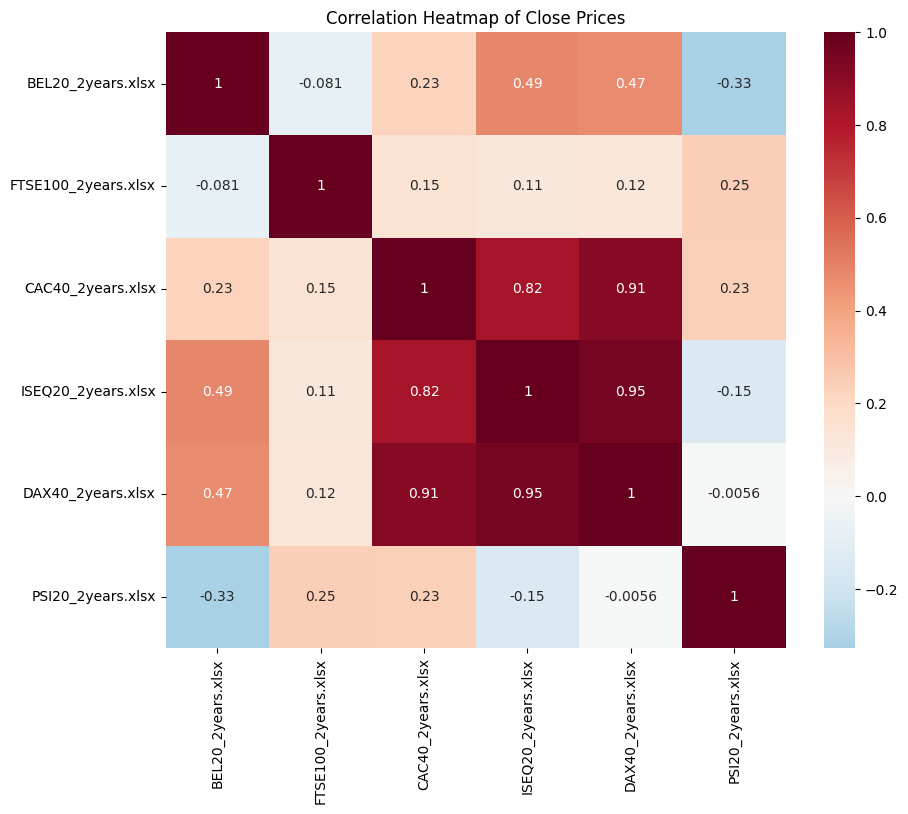

In [ ]:
# Calculate correlation matrix
correlation_matrix = combined_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap of Close Prices')
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load the datasets for CAC 40 and ISEQ 20
dax_data = pd.read_excel("DAX40_2years.xlsx")
iseq20_data = pd.read_excel("ISEQ20_2years.xlsx")


# Merge the two datasets based on the Date column
merged_data = pd.merge(dax_data, iseq20_data, on="Date", how="inner", suffixes=("_DAX40", "_ISEQ20"))

# Define a threshold for meeting points
threshold = 10  # You can adjust this value
merged_data["Price_Difference"] = abs(merged_data["Close_DAX40"] - merged_data["Close_ISEQ20"])
meeting_points = merged_data[merged_data["Price_Difference"] < threshold]

# Create the scatter plot
fig = px.scatter(
    merged_data,
    x="Close_DAX40",
    y="Close_ISEQ20",
    title="Scatter Plot: DAX 40 vs ISEQ 20",
    color="Price_Difference",
    color_continuous_scale="Viridis",  # Use a built-in color scale
    labels={"Close_DAX40": "DAX40 Close Price", "Close_ISEQ20": "ISEQ 20 Close Price"},
    hover_name="Date"
)

# Add meeting points as annotations
for index, row in meeting_points.iterrows():
    fig.add_annotation(
        x=row["Close_DAX"],
        y=row["Close_ISEQ20"],
        text="Meeting Point",
        showarrow=True,
        arrowhead=2,
        arrowcolor="red",
    )

# Customize plot appearance
fig.update_layout(
    coloraxis_colorbar=dict(title="Price Difference"),
    coloraxis_colorbar_len=0.6,
    coloraxis_colorbar_x=0.95,
)

# Show the plot
fig.show()



In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

# Load the datasets for CAC 40 and ISEQ 20
dax_df = pd.read_excel("DAX40_2years.xlsx")
iseq20_df = pd.read_excel("ISEQ20_2years.xlsx")

# Create a DataFrame with Date and Close columns for each index
dax_data = pd.DataFrame({"Date": dax_df["Date"], "Close_DAX": dax_df["Close"]})
iseq20_data = pd.DataFrame({"Date": iseq20_df["Date"], "Close_ISEQ20": iseq20_df["Close"]})

# Merge the dataframes based on the Date column
merged_df = pd.merge(dax_data, iseq20_data, on="Date", how="inner")

# Calculate daily returns
merged_df["Daily_Return_DAX"] = merged_df["Close_DAX"].pct_change()
merged_df["Daily_Return_ISEQ20"] = merged_df["Close_ISEQ20"].pct_change()

# Create a new column for color based on positive/negative returns
merged_df["Color"] = np.where(merged_df["Daily_Return_DAX"] >= 0, "Positive", "Negative")

# Create the scatter plot with regression line and colored points
fig = px.scatter(merged_df, x="Daily_Return_DAX", y="Daily_Return_ISEQ20",
                 color="Color", # Use the "Color" column for coloring
                 title="Scatter Plot of Daily Returns: DAX vs ISEQ 20",
                 trendline="ols")

# Show the plot
fig.show()




In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Load the datasets for CAC 40 and ISEQ 20
dax40_data = pd.read_excel("DAX40_2years.xlsx")
iseq20_data = pd.read_excel("ISEQ20_2years.xlsx")

# Merge the dataframes based on the Date column
merged_df = pd.merge(dax40_data, iseq20_data, on="Date", how="inner", suffixes=("_DAX40", "_ISEQ20"))

# Convert Date column to datetime format
merged_df["Date"] = pd.to_datetime(merged_df["Date"])

# Extract month and year from the Date column
merged_df["Month"] = merged_df["Date"].dt.month
merged_df["Year"] = merged_df["Date"].dt.year


# Box Plots: Monthly Close Prices of DAX 40 and ISEQ 20
box_plot = px.box(merged_df, x="Month", y=["Close_DAX40", "Close_ISEQ20"],
                  labels={"Month": "Month", "value": "Close Price"},
                  title="Box Plots: Monthly Close Prices of DAX 40 and ISEQ 20")
box_plot.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.api as sm

# Generate sample data (replace this with your actual data)
np.random.seed(42)
n_points = 100
iseq20_data = np.random.randn(n_points)
dax40_data = 0.96 * iseq20_data + 0.04 * np.random.randn(n_points)

# Create a pandas DataFrame
data = pd.DataFrame({'ISEQ20': iseq20_data, 'DAX40': dax40_data})

# Assuming your data has a datetime index
data.index = pd.date_range(start='2021-08-11', periods=n_points, freq='D')

# Perform decomposition
iseq20_decomposition = sm.tsa.seasonal_decompose(data['ISEQ20'], model='additive')
cac40_decomposition = sm.tsa.seasonal_decompose(data['DAX40'], model='additive')

# Create a new DataFrame with decomposed components
decomposed_data = pd.DataFrame({
    'ISEQ20_trend': iseq20_decomposition.trend,
    'ISEQ20_seasonal': iseq20_decomposition.seasonal,
    'ISEQ20_residual': iseq20_decomposition.resid,
    'DAX40_trend': cac40_decomposition.trend,
    'DAX40_seasonal': cac40_decomposition.seasonal,
    'DAX40_residual': cac40_decomposition.resid
}, index=data.index)

# Create a Seasonal Subseries Plot using Plotly
fig = px.line(decomposed_data, x=decomposed_data.index, y=['ISEQ20_seasonal', 'DAX40_seasonal'],
              title="Seasonal Subseries Plot for ISEQ20 and DAX40 Seasonal Components",
              labels={'value': 'Seasonal Component', 'index': 'Date'})

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots  # Import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate sample data (replace this with your actual data)
np.random.seed(42)
n_points = 100
iseq20_data = np.random.randn(n_points)
dax40_data = 0.96 * iseq20_data + 0.04 * np.random.randn(n_points)

# Create a pandas DataFrame
data = pd.DataFrame({'ISEQ20': iseq20_data, 'DAX40': dax40_data})

# Assuming your data has a datetime index
data.index = pd.date_range(start='2021-08-11', periods=n_points, freq='D')

# Perform time series decomposition
iseq20_decomposition = seasonal_decompose(data['ISEQ20'], model='additive', period=30)  # Adjust period as needed
cac40_decomposition = seasonal_decompose(data['DAX40'], model='additive', period=30)    # Adjust period as needed

# Create subplots for observed, trend, seasonal, and residual components using Plotly
fig = make_subplots(rows=4, cols=1, shared_xaxes=True,
                    subplot_titles=("Observed", "Trend", "Seasonal", "Residual"))

# Add traces for each component
fig.add_trace(go.Scatter(x=data.index, y=data['ISEQ20'], mode='lines', name='ISEQ20'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=iseq20_decomposition.trend, mode='lines', name='Trend'),
              row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=iseq20_decomposition.seasonal, mode='lines', name='Seasonal'),
              row=3, col=1)
fig.add_trace(go.Scatter(x=data.index, y=iseq20_decomposition.resid, mode='lines', name='Residual'),
              row=4, col=1)

# Update layout
fig.update_layout(title="Time Series Decomposition for ISEQ20",
                  xaxis_title="Date")

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.filters.hp_filter import hpfilter

# Generate sample data (replace this with your actual data)
np.random.seed(42)
n_points = 100
iseq20_data = np.random.randn(n_points)
dax40_data = 0.96 * iseq20_data + 0.04 * np.random.randn(n_points)

# Create a pandas DataFrame
data = pd.DataFrame({'ISEQ20': iseq20_data, 'DAX40': dax40_data})

# Assuming your data has a datetime index
data.index = pd.date_range(start='2021-08-11', periods=n_points, freq='D')

# Apply the Hodrick-Prescott filter
lambda_value = 1600  # Choose the smoothing parameter (adjust as needed)
iseq20_trend, iseq20_cyclical = hpfilter(data['ISEQ20'], lamb=lambda_value)
cac40_trend, cac40_cyclical = hpfilter(data['DAX40'], lamb=lambda_value)

# Create a figure with subplots for trend, cyclical, and residual components
fig = make_subplots(rows=3, cols=1, shared_xaxes=True,
                    subplot_titles=("Trend", "Cyclical", "Residual"))

# Add traces for each component
fig.add_trace(go.Scatter(x=data.index, y=iseq20_trend, mode='lines', name='ISEQ20 Trend'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=iseq20_cyclical, mode='lines', name='ISEQ20 Cyclical'),
              row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['ISEQ20'] - iseq20_trend - iseq20_cyclical,
                         mode='lines', name='ISEQ20 Residual'),
              row=3, col=1)

fig.add_trace(go.Scatter(x=data.index, y=cac40_trend, mode='lines', name='DAX40 Trend'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=cac40_cyclical, mode='lines', name='DAX40 Cyclical'),
              row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['DAX40'] - cac40_trend - cac40_cyclical,
                         mode='lines', name='DAX40 Residual'),
              row=3, col=1)

# Update layout
fig.update_layout(title="Hodrick-Prescott Filter Components",
                  xaxis_title="Date")

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Generate sample data (replace this with your actual data)
np.random.seed(42)
n_points = 100
iseq20_data = np.random.randn(n_points)
cac40_data = 0.96 * iseq20_data + 0.04 * np.random.randn(n_points)

# Create a pandas DataFrame
data = pd.DataFrame({'ISEQ20': iseq20_data, 'DAX40': cac40_data})

# Assuming your data has a datetime index
data.index = pd.date_range(start='2021-08-11', periods=n_points, freq='D')

# Calculate Simple Moving Average (SMA) with window size of 10
sma_window = 10
iseq20_sma = data['ISEQ20'].rolling(window=sma_window).mean()
cac40_sma = data['DAX40'].rolling(window=sma_window).mean()

# Calculate Expanding Moving Average
iseq20_ema = data['ISEQ20'].expanding().mean()
cac40_ema = data['DAX40'].expanding().mean()

# Calculate Exponentially Weighted Moving Average (EWMA)
alpha = 0.2  # Smoothing factor
iseq20_ewma = data['ISEQ20'].ewm(alpha=alpha, adjust=False).mean()
cac40_ewma = data['DAX40'].ewm(alpha=alpha, adjust=False).mean()

# Create a plot for moving averages using Plotly
fig = go.Figure()

# Original data
fig.add_trace(go.Scatter(x=data.index, y=data['ISEQ20'], mode='lines', name='ISEQ20'))
fig.add_trace(go.Scatter(x=data.index, y=data['DAX40'], mode='lines', name='DAX40'))

# Simple Moving Averages
fig.add_trace(go.Scatter(x=data.index, y=iseq20_sma, mode='lines', name=f'ISEQ20 SMA ({sma_window})'))
fig.add_trace(go.Scatter(x=data.index, y=cac40_sma, mode='lines', name=f'DAX40 SMA ({sma_window})'))

# Expanding Moving Averages
fig.add_trace(go.Scatter(x=data.index, y=iseq20_ema, mode='lines', name='ISEQ20 Expanding MA'))
fig.add_trace(go.Scatter(x=data.index, y=cac40_ema, mode='lines', name='DAX40 Expanding MA'))

# Exponentially Weighted Moving Averages
fig.add_trace(go.Scatter(x=data.index, y=iseq20_ewma, mode='lines', name=f'ISEQ20 EWMA (alpha={alpha})'))
fig.add_trace(go.Scatter(x=data.index, y=cac40_ewma, mode='lines', name=f'DAX40 EWMA (alpha={alpha})'))

# Update layout
fig.update_layout(title="Moving Averages",
                  xaxis_title="Date",
                  yaxis_title="Value")

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Generate sample data (replace this with your actual data)
np.random.seed(42)
n_points = 100
iseq20_data = np.random.randn(n_points)
dax_data = 0.96 * iseq20_data + 0.04 * np.random.randn(n_points)

# Create a pandas DataFrame
data = pd.DataFrame({'ISEQ20': iseq20_data, 'DAX': dax_data})

# Assuming your data has a datetime index
data.index = pd.date_range(start='2021-08-11', periods=n_points, freq='D')

# Fit Double Exponential Smoothing model for ISEQ20
iseq20_model = ExponentialSmoothing(data['ISEQ20'], trend='add', seasonal='add', seasonal_periods=7)
iseq20_fit = iseq20_model.fit()

# Fit Double Exponential Smoothing model for DAX
dax_model = ExponentialSmoothing(data['DAX'], trend='add', seasonal='add', seasonal_periods=7)
dax_fit = dax_model.fit()

# Forecast for the next 7 days
forecast_steps = 7
iseq20_forecast = iseq20_fit.forecast(steps=forecast_steps)
dax_forecast = dax_fit.forecast(steps=forecast_steps)

# Create a plot for Double Exponential Smoothing using Plotly
fig = go.Figure()

# Original data
fig.add_trace(go.Scatter(x=data.index, y=data['ISEQ20'], mode='lines', name='ISEQ20'))
fig.add_trace(go.Scatter(x=data.index, y=data['DAX'], mode='lines', name='DAX'))

# Fitted values
fig.add_trace(go.Scatter(x=data.index, y=iseq20_fit.fittedvalues, mode='lines', name='ISEQ20 Fitted'))
fig.add_trace(go.Scatter(x=data.index, y=dax_fit.fittedvalues, mode='lines', name='DAX Fitted'))

# Forecasted values
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='D')[1:]  # Start from the next day
fig.add_trace(go.Scatter(x=forecast_index, y=iseq20_forecast, mode='lines', name='ISEQ20 Forecast'))
fig.add_trace(go.Scatter(x=forecast_index, y=dax_forecast, mode='lines', name='DAX Forecast'))

# Update layout
fig.update_layout(title="Double Exponential Smoothing",
                  xaxis_title="Date",
                  yaxis_title="Value")

# Show the plot
fig.show()



In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

# Generate sample data (replace this with your actual data)
np.random.seed(42)
n_points = 100
iseq20_data = np.random.randn(n_points)
dax_data = 0.96 * iseq20_data + 0.04 * np.random.randn(n_points)

# Create a pandas DataFrame
data = pd.DataFrame({'Date': pd.date_range(start='2021-08-11', periods=n_points, freq='D'),
                     'ISEQ20': iseq20_data,
                     'DAX': dax_data})

# Melt the DataFrame for stacked area chart
melted_data = data.melt(id_vars=['Date'], value_vars=['ISEQ20', 'DAX'],
                        var_name='Index', value_name='Value')

# Create a stacked area chart using Plotly Express
fig = px.area(melted_data, x='Date', y='Value', color='Index',
              title='Stacked Area Chart (Similar to Stream Graph)')

# Show the plot
fig.show()
